In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [2]:
import io
%cd "C:\Users\lokes\Downloads"

C:\Users\lokes\Downloads


In [3]:
climatetweet=pd.read_csv("climatechange260623.csv")

In [4]:
import nltk
import textblob
import wordcloud

In [5]:
climatetweet.shape

(11003, 44)

In [6]:
tweet_txt=climatetweet.text

In [7]:
tweet_txt.head(10)

0    #ClimateChange will be the defining issue of t...
1    Lakes are a haven for biodiversity.\n\nHowever...
2    #ClimateChange | "Climate Change Affects Infla...
3    #Ocean heat is off the charts\n#ClimateChange\...
4    @PeterWSinclair @JunkScience "Carbon dioxide r...
5    @ScientistsX @sciencemuseum @DoctorsXr @XRebel...
6    “in the US, two-thirds of the financial losses...
7    @RepRudyYakym #ClimateChange - that you could ...
8    #Climatechange: #Melting #Glaciers in #JK rais...
9    "Rising temperatures, melting glaciers, and ex...
Name: text, dtype: object

In [8]:
tweet_txt=tweet_txt.str.lower()

In [9]:
tweet_txt.head(10)

0    #climatechange will be the defining issue of t...
1    lakes are a haven for biodiversity.\n\nhowever...
2    #climatechange | "climate change affects infla...
3    #ocean heat is off the charts\n#climatechange\...
4    @peterwsinclair @junkscience "carbon dioxide r...
5    @scientistsx @sciencemuseum @doctorsxr @xrebel...
6    “in the us, two-thirds of the financial losses...
7    @reprudyyakym #climatechange - that you could ...
8    #climatechange: #melting #glaciers in #jk rais...
9    "rising temperatures, melting glaciers, and ex...
Name: text, dtype: object

In [10]:
import re
def clean_txt(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [11]:
tweet_txt=[str(clean_txt(x)) for x in tweet_txt]

In [12]:
tweet_txt_df=pd.DataFrame(tweet_txt,columns=['tweet'])

In [13]:
from textblob import TextBlob

In [14]:
def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [15]:
tweet_txt_df['sentiment']=[str(analyze_sentiment(x)) for x in tweet_txt_df.tweet]

In [16]:
tweet_txt_df.sentiment.value_counts()

Positive    5411
Neutral     3313
Negative    2279
Name: sentiment, dtype: int64

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [18]:
tweet_tokens=tweet_txt_df.tweet.apply(word_tokenize)

In [19]:
stop_english=set(stopwords.words('english'))

In [20]:
tweet_tokens=tweet_tokens.apply(lambda x:[w for w in x if w not in stop_english])

In [21]:
tweet_tokens.head()

0    [defining, issue, lifetimes, young, people, me...
1    [lakes, biodiversity, however, lakes, disappea...
2    [climate, change, affects, inflation, inflatio...
3    [heat, charts, https, co, aytvgphz, https, co,...
4    [carbon, dioxide, remains, thousands, years, f...
Name: tweet, dtype: object

In [22]:
from wordcloud import WordCloud

In [23]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stop_english).generate(str(tweet_tokens))

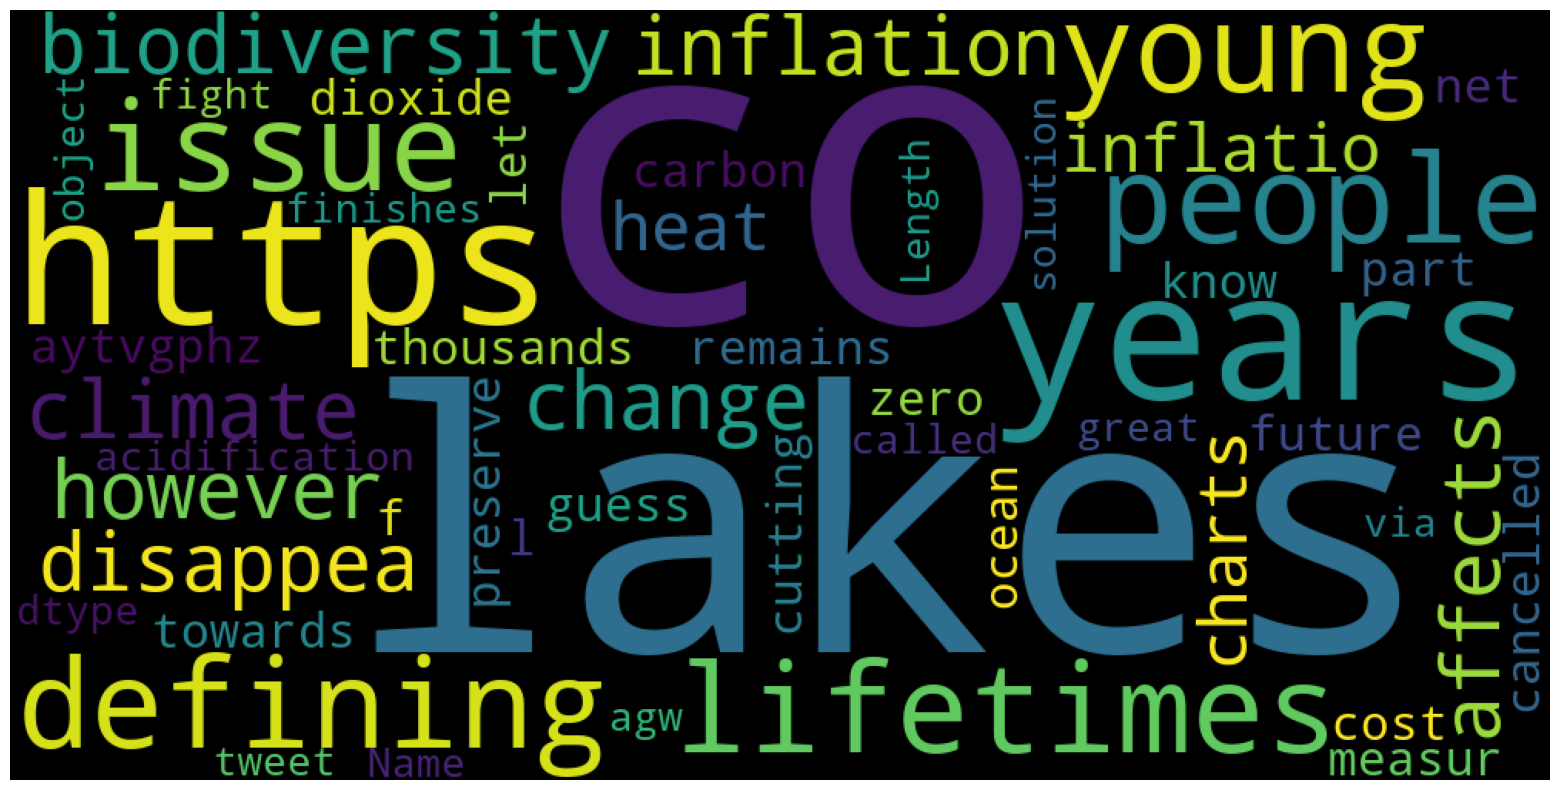

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
from nltk.probability import FreqDist
from nltk import flatten

In [26]:
tweet_tokens=tweet_tokens.to_list()

In [27]:
tweet_tokens=flatten(tweet_tokens)

In [28]:
tweet_tokens=[w for w in tweet_tokens if len(w)>2]

In [29]:
twee_freq=FreqDist(tweet_tokens)

In [30]:
twee_freq.most_common(100)

[('https', 12156),
 ('climate', 2802),
 ('amp', 2233),
 ('change', 1368),
 ('people', 972),
 ('global', 792),
 ('planet', 715),
 ('new', 682),
 ('world', 656),
 ('countries', 616),
 ('effects', 602),
 ('ice', 551),
 ('causing', 540),
 ('energy', 500),
 ('already', 499),
 ('comes', 472),
 ('today', 461),
 ('worst', 460),
 ('day', 459),
 ('responsible', 459),
 ('read', 455),
 ('least', 455),
 ('facing', 453),
 ('funds', 429),
 ('unlock', 421),
 ('thin', 411),
 ('one', 402),
 ('future', 400),
 ('need', 371),
 ('action', 365),
 ('warming', 359),
 ('like', 352),
 ('years', 350),
 ('help', 341),
 ('carbon', 337),
 ('impact', 330),
 ('emissions', 322),
 ('june', 321),
 ('weather', 320),
 ('via', 317),
 ('time', 315),
 ('earth', 303),
 ('let', 291),
 ('heat', 289),
 ('water', 288),
 ('learn', 286),
 ('impacts', 272),
 ('see', 263),
 ('could', 259),
 ('make', 259),
 ('fossil', 250),
 ('fight', 240),
 ('health', 239),
 ('must', 238),
 ('sustainable', 236),
 ('year', 230),
 ('join', 229),
 ('supp

In [31]:
remove_words=['https','via','amp']

In [32]:
tweet_tokens=[w for w in tweet_tokens if w not in remove_words]

In [37]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [38]:
wordcloud=WordCloud(width=1000,height=500,
                    stopwords=stop).generate(str(
    tweet_tokens))

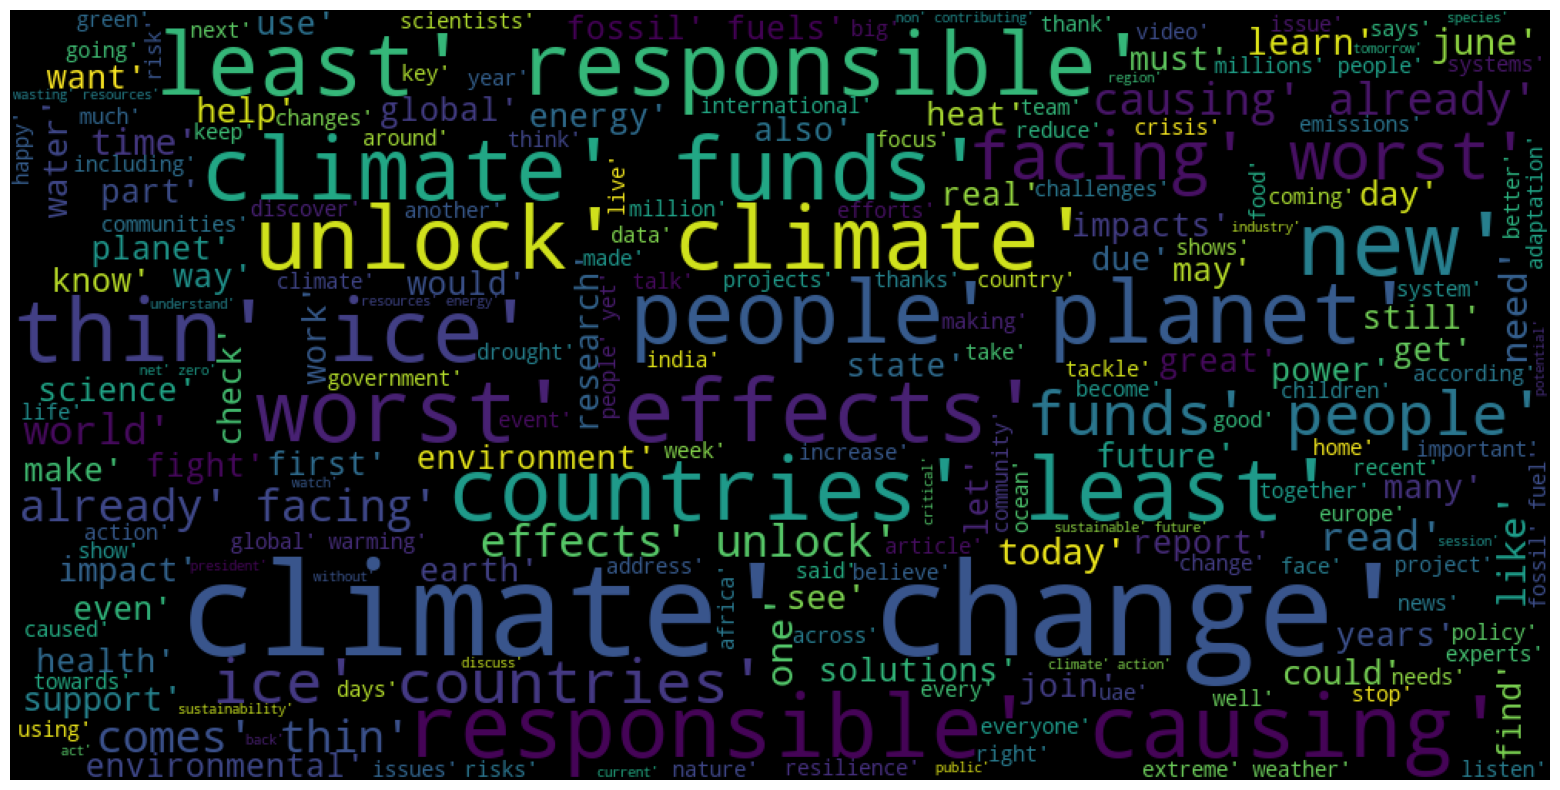

In [39]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
DTM=CountVectorizer(max_features=100,ngram_range=(2,2))

In [42]:
tweet_txt_df.tweet=tweet_txt_df.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_english)]))

In [43]:
tweet_txt_df.tweet=tweet_txt_df.tweet.apply(lambda x: ' '.join([word for word in x.split()  if word
                                                                not in (['https','via','amp'])]))

In [44]:
tweet_txt_df.tweet=tweet_txt_df.tweet.apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

In [45]:
X_DTM=DTM.fit_transform(tweet_txt_df.tweet)

In [46]:
pd.DataFrame(X_DTM.toarray(),columns=DTM.vocabulary_).head()

,climate change,carbon dioxide,fossil fuel,rising temperatures,extreme weather,weather events,take action,protect planet,rising sea,sea levels,...,birchwood conference,conference centre,centre boksburg,global cooling,underway birchwood,today birchwood,birchwood hotel,hotel boksburg,got solar,van nuys
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y=tweet_txt_df.sentiment
X=X_DTM

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
y=LabelEncoder().fit_transform(y)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logit=LogisticRegression(multi_class="multinomial",max_iter=2000)

In [52]:
logitmodel=logit.fit(X,y)

In [53]:
logitmodel.score(X,y)

0.5562119421975825

In [54]:
logitpredict=logitmodel.predict(X)

In [55]:
pd.crosstab(y,logitpredict)

col_0,0,1,2
row_0,,,
0,520,22,1737
1,11,310,2992
2,46,75,5290


In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

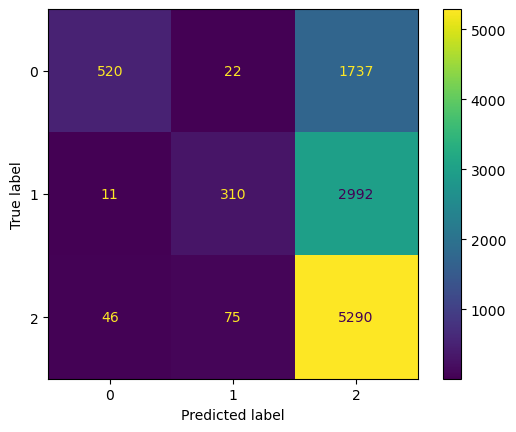

In [67]:
ConfusionMatrixDisplay.from_predictions(y,logitpredict)

In [68]:
print(classification_report(y,logitpredict))  

              precision    recall  f1-score   support

           0       0.90      0.23      0.36      2279
           1       0.76      0.09      0.17      3313
           2       0.53      0.98      0.69      5411

    accuracy                           0.56     11003
   macro avg       0.73      0.43      0.41     11003
weighted avg       0.68      0.56      0.46     11003



In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
tree=DecisionTreeClassifier(max_depth=6)

In [58]:
treemodel=tree.fit(X,y)

In [59]:
treemodel.score(X,y)

0.5528492229391984

In [60]:
#classification models can  also be build
from sklearn.model_selection import cross_val_score

In [61]:
cross_val_score(tree,X,y)

array([0.53702862, 0.63607451, 0.54566106, 0.50045455, 0.50954545])

In [62]:
np.mean([0.53702862, 0.63607451, 0.54566106, 0.50045455, 0.50954545])

0.5457528380000001